<a href="https://colab.research.google.com/github/ViniciusPrincipe/BitcoinPrediction-LSTM/blob/main/BtcLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from keras.callbacks import EarlyStopping
import sklearn.metrics as sk

In [2]:
df = pd.read_csv('/content/btc.csv')

dfLimpo = df['Close'].values
dfLimpo = dfLimpo[::-1]

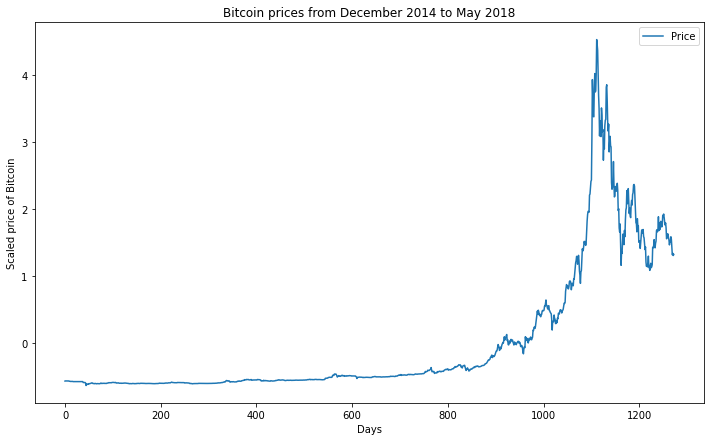

In [3]:
#data preprocessing(scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfLimpo.reshape(-1, 1))
#plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(scaled_data, label='Price')
plt.legend()
plt.show()

In [4]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [5]:
def model_evaluation(model,x_test,y_test):
  y_pred = model.predict(x_test)
  y_testNorm = scaler.inverse_transform(y_test)
  y_predNorm = scaler.inverse_transform(y_pred)
  #y_testNorm = y_test
  #y_predNorm = y_pred
  mse = sk.mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = sk.mean_absolute_error(y_test, y_pred)
  r2 = sk.r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print("Mean squared error: ", mse)
  print("Root mean squared error: ", rmse)
  print("Mean absolute error: ", mae)
  print("R2 score: ", r2)
  
  # Plot the predictions and actual values
  plt.plot(y_testNorm, label='Actual')
  plt.plot(y_predNorm, label='Predicted')
  plt.xlabel('Time')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [6]:
def plot_history(history):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

Modelo 1: window_size = 7

In [7]:
#Criando datasets usando uma janela com 7 pontos
window_size = 7
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 7, 1)
y_train size: (886, 1)
X_val size: (127, 7, 1)
y_val size: (127, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)


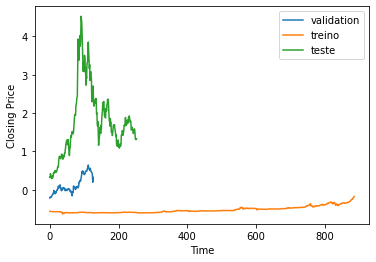

In [8]:
# Plot the predictions and actual values
plt.plot(y_val, label='validation')
plt.plot(y_train, label='treino')
plt.plot(y_test, label='teste')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [9]:
#Configurações globais para todos os modelos
early_stop_val = EarlyStopping(monitor= 'val_loss',  patience= 6)
early_stop_train = EarlyStopping(monitor = 'loss',patience = 8)

Epoch 1/250
111/111 [==============================] - 8s 20ms/step - loss: 0.0180 - val_loss: 0.0579
Epoch 2/250
111/111 [==============================] - 1s 11ms/step - loss: 5.4813e-04 - val_loss: 0.0425
Epoch 3/250
111/111 [==============================] - 2s 16ms/step - loss: 2.8351e-04 - val_loss: 0.0304
Epoch 4/250
111/111 [==============================] - 2s 16ms/step - loss: 1.4444e-04 - val_loss: 0.0235
Epoch 5/250
111/111 [==============================] - 2s 15ms/step - loss: 1.0491e-04 - val_loss: 0.0204
Epoch 6/250
111/111 [==============================] - 2s 17ms/step - loss: 9.5695e-05 - val_loss: 0.0191
Epoch 7/250
111/111 [==============================] - 1s 11ms/step - loss: 9.6111e-05 - val_loss: 0.0183
Epoch 8/250
111/111 [==============================] - 1s 12ms/step - loss: 9.6526e-05 - val_loss: 0.0181
Epoch 9/250
111/111 [==============================] - 1s 12ms/step - loss: 9.8430e-05 - val_loss: 0.0179
Epoch 10/250
111/111 [============================

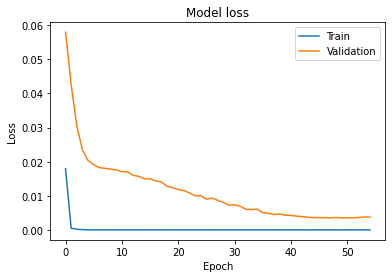

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.22810612400061003
Root mean squared error:  0.477604568655504
Mean absolute error:  0.2874601144880179
R2 score:  0.7281383814869202


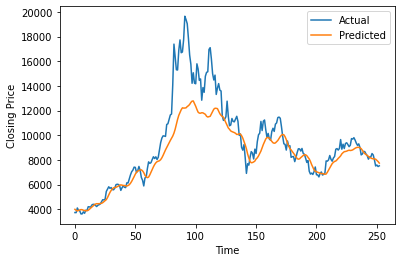

In [10]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 5s 14ms/step - loss: 0.3185 - val_loss: 0.0791
Epoch 2/250
111/111 [==============================] - 1s 6ms/step - loss: 0.3153 - val_loss: 0.0789
Epoch 3/250
111/111 [==============================] - 1s 7ms/step - loss: 0.3122 - val_loss: 0.0788
Epoch 4/250
111/111 [==============================] - 1s 8ms/step - loss: 0.3091 - val_loss: 0.0786
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 0.3060 - val_loss: 0.0785
Epoch 6/250
111/111 [==============================] - 1s 7ms/step - loss: 0.3030 - val_loss: 0.0784
Epoch 7/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2999 - val_loss: 0.0782
Epoch 8/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2969 - val_loss: 0.0781
Epoch 9/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2939 - val_loss: 0.0779
Epoch 10/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2909 - val_l

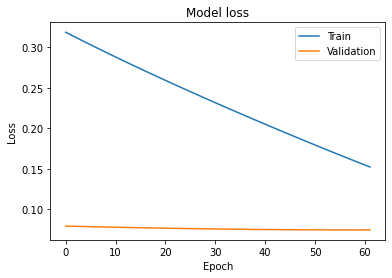

8/8 [==============================] - 1s 4ms/step
Mean squared error:  3.5814063600694928
Root mean squared error:  1.8924603985472173
Mean absolute error:  1.6808563233263705
R2 score:  -3.2683945197320803


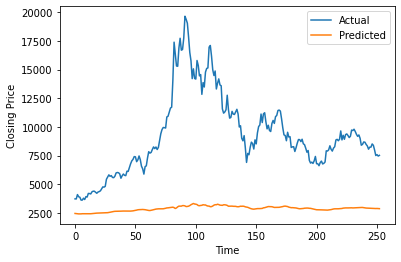

In [11]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 11ms/step - loss: 0.0230 - val_loss: 0.0614
Epoch 2/250
111/111 [==============================] - 1s 8ms/step - loss: 0.0019 - val_loss: 0.0444
Epoch 3/250
111/111 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0309
Epoch 4/250
111/111 [==============================] - 1s 8ms/step - loss: 0.0012 - val_loss: 0.0231
Epoch 5/250
111/111 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.0190
Epoch 6/250
111/111 [==============================] - 1s 8ms/step - loss: 8.9987e-04 - val_loss: 0.0173
Epoch 7/250
111/111 [==============================] - 1s 8ms/step - loss: 8.1889e-04 - val_loss: 0.0171
Epoch 8/250
111/111 [==============================] - 1s 8ms/step - loss: 7.8491e-04 - val_loss: 0.0168
Epoch 9/250
111/111 [==============================] - 1s 6ms/step - loss: 8.1303e-04 - val_loss: 0.0175
Epoch 10/250
111/111 [==============================] - 1s 7ms/step - loss

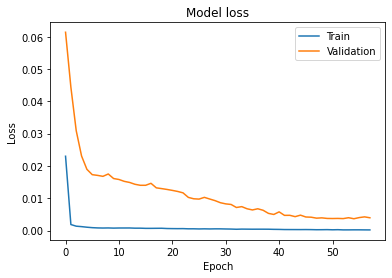

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.15924465417454808
Root mean squared error:  0.3990547007297973
Mean absolute error:  0.240783304487747
R2 score:  0.8102089121319139


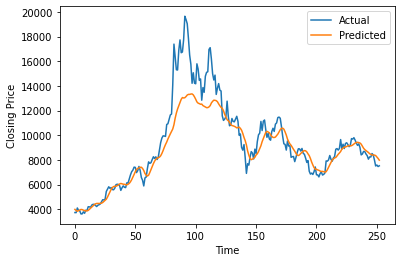

In [12]:
#modelo com dropout
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test,y_test)

Modelo 2: window_size = 7

Epoch 1/250
111/111 [==============================] - 5s 18ms/step - loss: 0.0123 - val_loss: 0.0284
Epoch 2/250
111/111 [==============================] - 1s 11ms/step - loss: 2.7232e-04 - val_loss: 0.0149
Epoch 3/250
111/111 [==============================] - 1s 12ms/step - loss: 1.2895e-04 - val_loss: 0.0092
Epoch 4/250
111/111 [==============================] - 1s 10ms/step - loss: 9.6029e-05 - val_loss: 0.0078
Epoch 5/250
111/111 [==============================] - 1s 10ms/step - loss: 1.0149e-04 - val_loss: 0.0072
Epoch 6/250
111/111 [==============================] - 1s 12ms/step - loss: 1.0059e-04 - val_loss: 0.0069
Epoch 7/250
111/111 [==============================] - 2s 14ms/step - loss: 1.0606e-04 - val_loss: 0.0070
Epoch 8/250
111/111 [==============================] - 2s 17ms/step - loss: 1.0134e-04 - val_loss: 0.0068
Epoch 9/250
111/111 [==============================] - 2s 15ms/step - loss: 9.9023e-05 - val_loss: 0.0065
Epoch 10/250
111/111 [============================

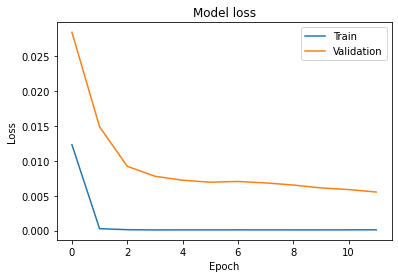

8/8 [==============================] - 0s 5ms/step
Mean squared error:  0.6219042042304131
Root mean squared error:  0.7886090312888974
Mean absolute error:  0.5841654932958272
R2 score:  0.2588016465453732


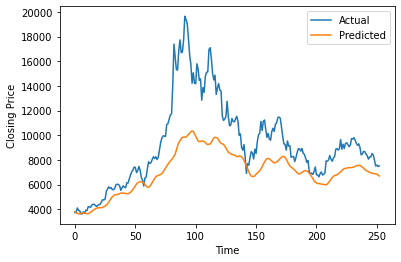

In [13]:
model2 = Sequential()
model2.add(LSTM(150, input_shape=(window_size, 1)))
model2.add(Dense(1))
optimizer = keras.optimizers.Adam()
model2.compile(loss='mean_squared_error', optimizer= optimizer)

history = model2.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model2,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 5s 19ms/step - loss: 0.2830 - val_loss: 0.0700
Epoch 2/250
111/111 [==============================] - 2s 14ms/step - loss: 0.2765 - val_loss: 0.0693
Epoch 3/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2702 - val_loss: 0.0686
Epoch 4/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2640 - val_loss: 0.0680
Epoch 5/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2579 - val_loss: 0.0673
Epoch 6/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2518 - val_loss: 0.0667
Epoch 7/250
111/111 [==============================] - 1s 10ms/step - loss: 0.2459 - val_loss: 0.0661
Epoch 8/250
111/111 [==============================] - 1s 10ms/step - loss: 0.2400 - val_loss: 0.0655
Epoch 9/250
111/111 [==============================] - 2s 15ms/step - loss: 0.2342 - val_loss: 0.0649
Epoch 10/250
111/111 [==============================] - 2s 15ms/step - loss: 0.228

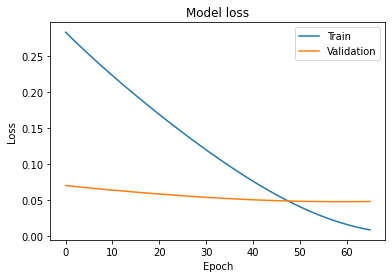

8/8 [==============================] - 1s 7ms/step
Mean squared error:  1.852677527636284
Root mean squared error:  1.3611309737259982
Mean absolute error:  1.1720413665727785
R2 score:  -1.2080595751329515


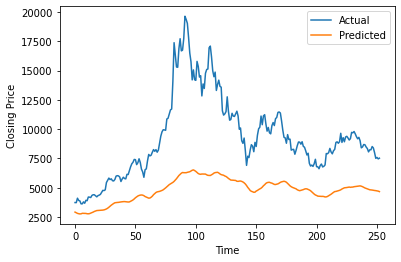

In [14]:
model2 = Sequential()
model2.add(LSTM(150, input_shape=(window_size, 1)))
model2.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model2.compile(loss='mean_squared_error', optimizer= optimizer)

history = model2.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model2,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 17ms/step - loss: 0.2440 - val_loss: 0.0607
Epoch 2/250
111/111 [==============================] - 2s 14ms/step - loss: 0.2376 - val_loss: 0.0600
Epoch 3/250
111/111 [==============================] - 1s 13ms/step - loss: 0.2323 - val_loss: 0.0594
Epoch 4/250
111/111 [==============================] - 2s 16ms/step - loss: 0.2260 - val_loss: 0.0587
Epoch 5/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2211 - val_loss: 0.0581
Epoch 6/250
111/111 [==============================] - 1s 10ms/step - loss: 0.2145 - val_loss: 0.0575
Epoch 7/250
111/111 [==============================] - 1s 10ms/step - loss: 0.2094 - val_loss: 0.0569
Epoch 8/250
111/111 [==============================] - 2s 14ms/step - loss: 0.2030 - val_loss: 0.0563
Epoch 9/250
111/111 [==============================] - 1s 11ms/step - loss: 0.1981 - val_loss: 0.0557
Epoch 10/250
111/111 [==============================] - 1s 10ms/step - loss: 0.191

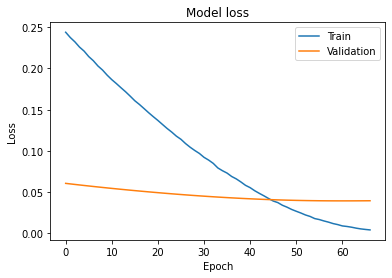

8/8 [==============================] - 0s 5ms/step
Mean squared error:  1.5872020880442108
Root mean squared error:  1.2598420885349921
Mean absolute error:  1.0708088077010964
R2 score:  -0.8916604297826087


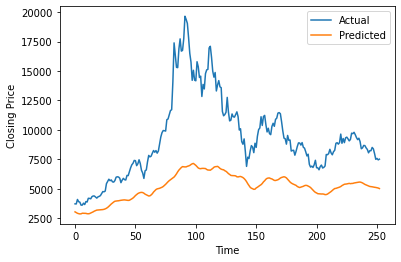

In [15]:
model2 = Sequential()
model2.add(LSTM(150, input_shape=(window_size, 1)))
model2.add(Dropout(0.15))
model2.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model2.compile(loss='mean_squared_error', optimizer= optimizer)

history = model2.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model2,x_test,y_test)

Modelo 3: window_size = 5

In [16]:
#Criando datasets usando uma janela com 5 pontos
window_size = 5
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 5, 1)
y_train size: (886, 1)
X_val size: (127, 5, 1)
y_val size: (127, 1)
X_test size: (255, 5, 1)
y_test size: (255, 1)


Epoch 1/250
111/111 [==============================] - 4s 12ms/step - loss: 0.0226 - val_loss: 0.0680
Epoch 2/250
111/111 [==============================] - 1s 7ms/step - loss: 6.1593e-04 - val_loss: 0.0527
Epoch 3/250
111/111 [==============================] - 1s 7ms/step - loss: 3.5941e-04 - val_loss: 0.0394
Epoch 4/250
111/111 [==============================] - 1s 7ms/step - loss: 1.8104e-04 - val_loss: 0.0298
Epoch 5/250
111/111 [==============================] - 1s 6ms/step - loss: 1.0427e-04 - val_loss: 0.0249
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 8.5440e-05 - val_loss: 0.0227
Epoch 7/250
111/111 [==============================] - 1s 5ms/step - loss: 7.7628e-05 - val_loss: 0.0215
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 7.7260e-05 - val_loss: 0.0209
Epoch 9/250
111/111 [==============================] - 1s 8ms/step - loss: 7.9112e-05 - val_loss: 0.0205
Epoch 10/250
111/111 [==============================] - 1s

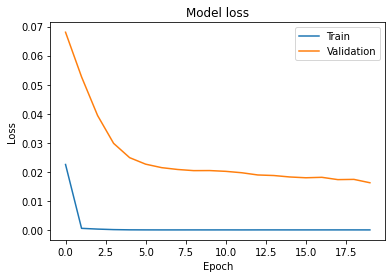

8/8 [==============================] - 0s 3ms/step
Mean squared error:  2.076731167399916
Root mean squared error:  1.4410868007860997
Mean absolute error:  1.1763252187215407
R2 score:  -1.4419568072037223


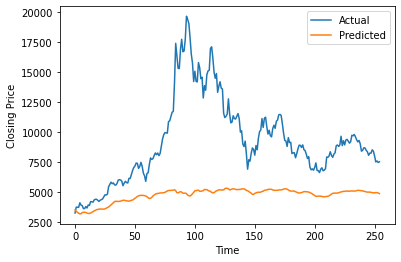

In [17]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(window_size, 1)))
model3.add(Dense(1))

optimizer = keras.optimizers.Adam()
model3.compile(loss='mean_squared_error', optimizer= optimizer)

history = model3.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model3,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 11ms/step - loss: 0.0402 - val_loss: 0.1104
Epoch 2/250
111/111 [==============================] - 1s 5ms/step - loss: 0.0022 - val_loss: 0.0955
Epoch 3/250
111/111 [==============================] - 1s 7ms/step - loss: 0.0018 - val_loss: 0.0778
Epoch 4/250
111/111 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 0.0611
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0491
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 0.0011 - val_loss: 0.0404
Epoch 7/250
111/111 [==============================] - 1s 5ms/step - loss: 9.4672e-04 - val_loss: 0.0324
Epoch 8/250
111/111 [==============================] - 1s 5ms/step - loss: 9.2735e-04 - val_loss: 0.0298
Epoch 9/250
111/111 [==============================] - 1s 6ms/step - loss: 8.0859e-04 - val_loss: 0.0284
Epoch 10/250
111/111 [==============================] - 1s 8ms/step - loss: 7.

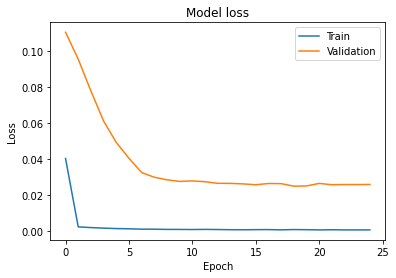

9/9 [==============================] - 1s 3ms/step
Mean squared error:  2.2707764628585996
Root mean squared error:  1.5069095735506493
Mean absolute error:  1.260015784262342
R2 score:  -1.6455752924409945


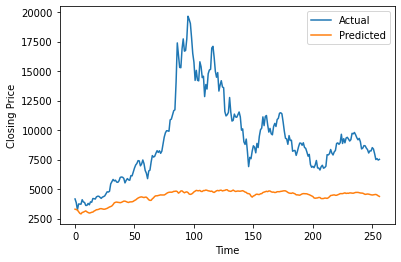

In [24]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(window_size, 1)))
model3.add(Dropout(0.1))
model3.add(Dense(1))
optimizer = keras.optimizers.Adam()
model3.compile(loss='mean_squared_error', optimizer= optimizer)

history = model3.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model3,x_test,y_test)

modelo 4: window_size = 5

Epoch 1/250
111/111 [==============================] - 4s 13ms/step - loss: 0.2478 - val_loss: 0.0621
Epoch 2/250
111/111 [==============================] - 1s 8ms/step - loss: 0.2432 - val_loss: 0.0617
Epoch 3/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2388 - val_loss: 0.0613
Epoch 4/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2344 - val_loss: 0.0609
Epoch 5/250
111/111 [==============================] - 1s 10ms/step - loss: 0.2300 - val_loss: 0.0605
Epoch 6/250
111/111 [==============================] - 1s 8ms/step - loss: 0.2257 - val_loss: 0.0602
Epoch 7/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2214 - val_loss: 0.0598
Epoch 8/250
111/111 [==============================] - 1s 13ms/step - loss: 0.2172 - val_loss: 0.0595
Epoch 9/250
111/111 [==============================] - 1s 10ms/step - loss: 0.2130 - val_loss: 0.0591
Epoch 10/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2089 - v

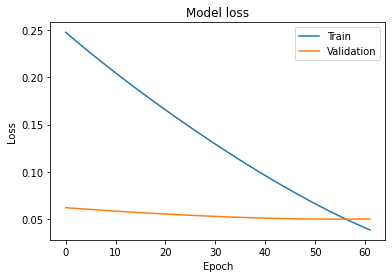

8/8 [==============================] - 1s 9ms/step
Mean squared error:  2.1161095999262587
Root mean squared error:  1.4546853955155592
Mean absolute error:  1.2712952394473975
R2 score:  -1.4882605526640016


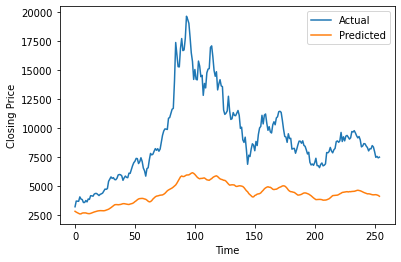

In [19]:
model4 = Sequential()
model4.add(LSTM(150, input_shape=(window_size, 1)))
model4.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model4.compile(loss='mean_squared_error', optimizer= optimizer)

history = model4.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model4,x_test,y_test)

Modelo 5: window_size = 3

In [28]:
window_size = 3
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 3, 1)
y_train size: (886, 1)
X_val size: (127, 3, 1)
y_val size: (127, 1)
X_test size: (257, 3, 1)
y_test size: (257, 1)


Epoch 1/250
111/111 [==============================] - 3s 8ms/step - loss: 0.0496 - val_loss: 0.1273
Epoch 2/250
111/111 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.1093
Epoch 3/250
111/111 [==============================] - 1s 5ms/step - loss: 0.0020 - val_loss: 0.0931
Epoch 4/250
111/111 [==============================] - 1s 5ms/step - loss: 0.0017 - val_loss: 0.0767
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 0.0015 - val_loss: 0.0623
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0519
Epoch 7/250
111/111 [==============================] - 1s 6ms/step - loss: 9.0480e-04 - val_loss: 0.0441
Epoch 8/250
111/111 [==============================] - 0s 4ms/step - loss: 9.0982e-04 - val_loss: 0.0393
Epoch 9/250
111/111 [==============================] - 1s 5ms/step - loss: 8.6185e-04 - val_loss: 0.0356
Epoch 10/250
111/111 [==============================] - 1s 5ms/step - loss: 8.6

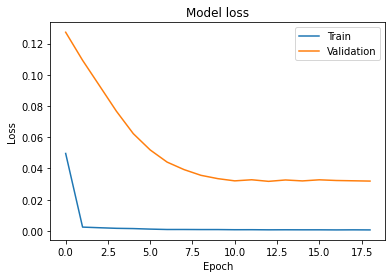

9/9 [==============================] - 1s 3ms/step
Mean squared error:  2.656324668718802
Root mean squared error:  1.6298235084569133
Mean absolute error:  1.372871158582582
R2 score:  -2.0947594477957963


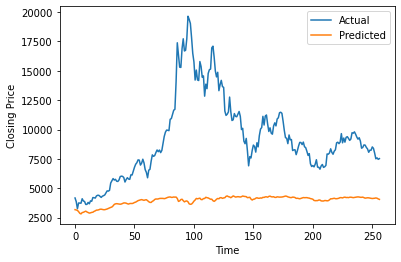

In [29]:
model5 = Sequential()
model5.add(LSTM(50, input_shape=(window_size, 1)))
model5.add(Dropout(0.1))
model5.add(Dense(1))
optimizer = keras.optimizers.Adam()
model5.compile(loss='mean_squared_error', optimizer= optimizer)

history = model5.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model5,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 10ms/step - loss: 0.0387 - val_loss: 0.1073
Epoch 2/250
111/111 [==============================] - 1s 6ms/step - loss: 0.0011 - val_loss: 0.0919
Epoch 3/250
111/111 [==============================] - 1s 9ms/step - loss: 8.0452e-04 - val_loss: 0.0743
Epoch 4/250
111/111 [==============================] - 1s 9ms/step - loss: 5.1616e-04 - val_loss: 0.0591
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 3.0194e-04 - val_loss: 0.0465
Epoch 6/250
111/111 [==============================] - 1s 7ms/step - loss: 1.6915e-04 - val_loss: 0.0377
Epoch 7/250
111/111 [==============================] - 1s 5ms/step - loss: 9.6737e-05 - val_loss: 0.0319
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 6.7423e-05 - val_loss: 0.0288
Epoch 9/250
111/111 [==============================] - 1s 6ms/step - loss: 6.0751e-05 - val_loss: 0.0270
Epoch 10/250
111/111 [==============================] - 1s 6ms

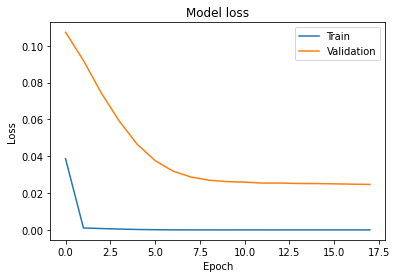

9/9 [==============================] - 1s 4ms/step
Mean squared error:  2.4758133014599766
Root mean squared error:  1.5734717351957666
Mean absolute error:  1.3109989602745575
R2 score:  -1.8844541090556235


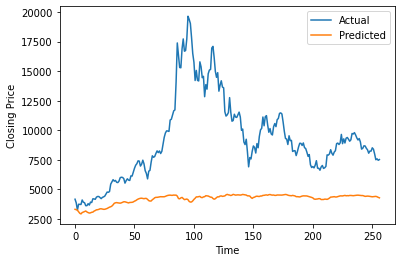

In [33]:
model5 = Sequential()
model5.add(LSTM(50, input_shape=(window_size, 1)))
model5.add(Dense(1))
optimizer = keras.optimizers.Adam()
model5.compile(loss='mean_squared_error', optimizer= optimizer)

history = model5.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model5,x_test,y_test)

Modelo 6: window_size = 3

Epoch 1/250
111/111 [==============================] - 6s 19ms/step - loss: 0.0177 - val_loss: 0.0580
Epoch 2/250
111/111 [==============================] - 1s 11ms/step - loss: 5.1800e-04 - val_loss: 0.0382
Epoch 3/250
111/111 [==============================] - 1s 11ms/step - loss: 2.4842e-04 - val_loss: 0.0228
Epoch 4/250
111/111 [==============================] - 1s 10ms/step - loss: 1.0158e-04 - val_loss: 0.0145
Epoch 5/250
111/111 [==============================] - 1s 9ms/step - loss: 6.2986e-05 - val_loss: 0.0114
Epoch 6/250
111/111 [==============================] - 1s 9ms/step - loss: 5.7042e-05 - val_loss: 0.0104
Epoch 7/250
111/111 [==============================] - 1s 12ms/step - loss: 5.6256e-05 - val_loss: 0.0101
Epoch 8/250
111/111 [==============================] - 1s 11ms/step - loss: 5.9868e-05 - val_loss: 0.0098
Epoch 9/250
111/111 [==============================] - 1s 10ms/step - loss: 5.6029e-05 - val_loss: 0.0099
Epoch 10/250
111/111 [==============================

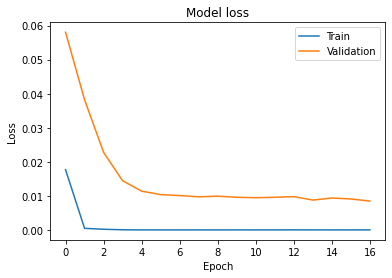

9/9 [==============================] - 0s 4ms/step
Mean squared error:  1.166004958832063
Root mean squared error:  1.0798170950823398
Mean absolute error:  0.8539853105163004
R2 score:  -0.358457761212875


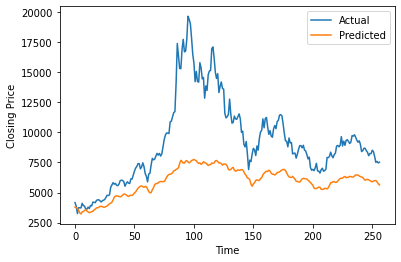

In [36]:
model6 = Sequential()
model6.add(LSTM(150, input_shape=(window_size, 1)))
model6.add(Dense(1))
optimizer = keras.optimizers.Adam()
model6.compile(loss='mean_squared_error', optimizer= optimizer)

history = model6.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model6,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 11ms/step - loss: 0.0155 - val_loss: 0.0500
Epoch 2/250
111/111 [==============================] - 1s 9ms/step - loss: 7.8355e-04 - val_loss: 0.0335
Epoch 3/250
111/111 [==============================] - 1s 10ms/step - loss: 5.5077e-04 - val_loss: 0.0209
Epoch 4/250
111/111 [==============================] - 1s 7ms/step - loss: 4.8395e-04 - val_loss: 0.0125
Epoch 5/250
111/111 [==============================] - 1s 11ms/step - loss: 4.1381e-04 - val_loss: 0.0104
Epoch 6/250
111/111 [==============================] - 1s 11ms/step - loss: 3.9213e-04 - val_loss: 0.0094
Epoch 7/250
111/111 [==============================] - 1s 8ms/step - loss: 3.6141e-04 - val_loss: 0.0085
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 3.6134e-04 - val_loss: 0.0080
Epoch 9/250
111/111 [==============================] - 1s 7ms/step - loss: 3.8510e-04 - val_loss: 0.0080
Epoch 10/250
111/111 [==============================] -

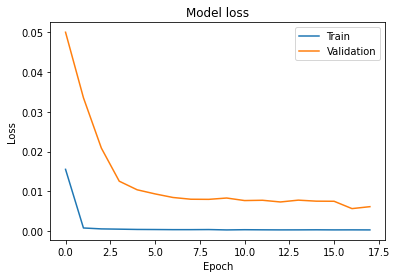

9/9 [==============================] - 1s 4ms/step
Mean squared error:  0.8052118773863728
Root mean squared error:  0.8973359891291404
Mean absolute error:  0.700477849263369
R2 score:  0.061885358230408416


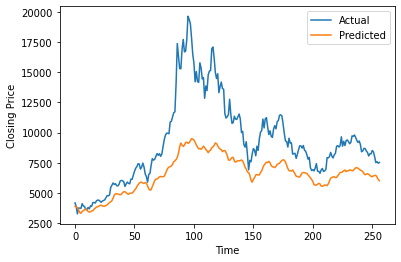

In [34]:
model6 = Sequential()
model6.add(LSTM(150, input_shape=(window_size, 1)))
model6.add(Dropout(0.1))
model6.add(Dense(1))

optimizer = keras.optimizers.Adam()
model6.compile(loss='mean_squared_error', optimizer= optimizer)

history = model6.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model6,x_test,y_test)

Fiquei um pouco desconfiado por conta da grande diferença de loss entre treino e validação, mas acredito que isso está ocorrendo pela grande diferença entre os dados dos dois datasets